## In this Notebook, I will define a target feature, and based on that, I will pre-process, analyse and select data/features in order to be modelled under any Supervised Machine Learning model. Once the model was selected and tuned, it will be saved ready to be used in the FrontEnd app. 

# 1. Import DATA set

In [1]:
#Import libraries to manage Dataset. The rest of libraries needed will be imported later on once requiered.
import numpy as np
import pandas as pd

In [2]:
#Peek our data
df = pd.read_csv('Data_sets/Pollutant_Meteo_merged_ready.csv',index_col=0)
pd.options.display.max_columns = None
df

,data,CO max,H2S max,NO max,NO2 max,NOx max,PM1 max,PM10 max,PM2.5 max,SO2 max,CO,H2S,NO,NO2,NOx,PM1,PM10,PM2.5,SO2,data_lectura,Pressió atmosfèrica màxima,Pressió atmosfèrica mínima,Humitat relativa màxima,Velocitat del vent a 10 m (esc.),Direcció de vent 10 m (m. 1),Temperatura,Humitat relativa,Pressió atmosfèrica,Precipitació,Irradiància solar global,Temperatura màxima,Temperatura mínima,Humitat relativa mínima,Ratxa màxima del vent a 10 m,Direcció de la ratxa màxima del vent a 10 m,Precipitació màxima en 1 minut
0,2010-01-01,0.2,1.4,1.0,7.0,NaN,NaN,NaN,NaN,1.0,0.200000,1.108333,1.000000,2.625000,NaN,NaN,NaN,NaN,1.000000,2010-01-01,1003.531915,1002.680851,45.191489,5.848936,267.234043,11.278723,44.170213,1003.127660,0.000000,71.574468,11.444681,11.102128,43.042553,12.021277,271.957447,0.000000
1,2010-01-02,0.2,1.8,13.0,44.0,NaN,NaN,NaN,NaN,1.0,0.200000,1.137500,2.250000,12.916667,NaN,NaN,NaN,NaN,1.000000,2010-01-02,1016.875000,1016.312500,57.020833,3.537500,220.875000,9.833333,55.625000,1016.645833,0.000000,61.458333,10.056250,9.604167,54.312500,6.714583,216.187500,0.000000
2,2010-01-03,0.3,1.6,17.0,48.0,NaN,NaN,NaN,NaN,7.0,0.204167,1.158333,3.625000,22.166667,NaN,NaN,NaN,NaN,1.875000,2010-01-03,1016.458333,1016.125000,79.250000,1.527083,101.083333,9.666667,78.000000,1016.312500,0.000000,93.895833,9.927083,9.418750,76.687500,2.870833,118.208333,0.000000
3,2010-01-04,0.2,2.0,26.0,42.0,NaN,NaN,NaN,NaN,4.0,0.200000,1.382609,8.217391,28.304348,NaN,NaN,NaN,NaN,1.652174,2010-01-04,1008.625000,1008.354167,82.583333,1.802083,81.458333,9.406250,81.625000,1008.500000,0.250000,36.604167,9.572917,9.233333,80.500000,3.570833,82.333333,0.027083
4,2010-01-05,0.4,1.4,23.0,44.0,NaN,NaN,NaN,NaN,2.0,0.220833,1.037500,5.750000,24.958333,NaN,NaN,NaN,NaN,1.083333,2010-01-05,1000.083333,999.833333,86.187500,1.868750,158.625000,9.716667,85.458333,999.979167,0.079167,14.375000,9.787500,9.654167,84.625000,3.497917,174.458333,0.022917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,2020-12-27,NaN,3.1,13.0,44.0,63.0,23.0,28.0,24.0,5.0,NaN,1.408333,2.833333,13.625000,17.416667,8.291667,10.458333,8.916667,1.500000,2020-12-27,1009.404167,1008.766667,65.937500,1.931250,217.395833,6.831250,63.083333,1009.087500,0.000000,59.062500,7.322917,6.295833,60.708333,4.272917,240.083333,0.000000
3988,2020-12-28,NaN,1.6,6.0,27.0,37.0,4.0,26.0,6.0,9.0,NaN,1.208333,1.541667,7.833333,9.666667,2.083333,7.541667,3.083333,5.416667,2020-12-28,995.566667,994.956250,49.062500,5.014583,265.958333,10.668750,47.375000,995.262500,0.000000,106.604167,10.983333,10.360417,45.750000,10.270833,269.041667,0.000000
3989,2020-12-29,NaN,1.5,5.0,15.0,16.0,8.0,14.0,9.0,4.0,NaN,1.150000,1.250000,6.791667,8.166667,2.458333,4.708333,3.208333,2.333333,2020-12-29,1001.879167,1001.518750,47.687500,3.875000,258.208333,10.533333,46.104167,1001.689583,0.000000,91.479167,10.879167,10.147917,44.708333,8.314583,270.229167,0.000000
3990,2020-12-30,NaN,1.3,3.0,20.0,25.0,2.0,42.0,5.0,1.0,NaN,1.120833,1.208333,5.458333,6.916667,1.416667,7.500000,2.250000,1.000000,2020-12-30,1010.639583,1010.081250,49.250000,6.022917,295.020833,9.764583,48.312500,1010.368750,0.000000,77.208333,9.947917,9.558333,47.354167,12.089583,293.333333,0.000000


In [3]:
#Let's create a new column as Alert, once PM2.5 max value is upper threshold 25, as state in pollutant norm.
df['Alert'] = ["1" if a >=25 else "0" for a in df['PM2.5 max']]
#As we want to predict 24h PM2.5 pollutant, let's create and Alert 24h by moving row up in column 'Alert'
df['Alert_nxt24h'] = df['Alert'].shift(-1)
#Let's remove 'Alert' and convert 'Alert next 24h' into unique 'Alert' column 
df.drop(['Alert'], axis =1)
df['Alert']=df['Alert_nxt24h']
df=df.drop(['Alert_nxt24h'], axis =1)

In [4]:
#Skew distribution
skew = df.skew()
print(skew)

CO max                                         1.913773
H2S max                                        4.409012
NO max                                         2.612130
NO2 max                                        2.000400
NOx max                                        1.761434
PM1 max                                        1.499718
PM10 max                                       2.865904
PM2.5 max                                      1.641074
SO2 max                                        5.639295
CO                                             1.833302
H2S                                            2.381244
NO                                             2.905730
NO2                                            0.794463
NOx                                            1.345018
PM1                                            1.554037
PM10                                           1.066574
PM2.5                                          1.235994
SO2                                            2

#### NOTA: Not too bad distribution unless Raining features related, where it is highlighted a great non-simetric distribution of the data. Based on Feature importance impact on target, they will be scaled/removed if necessary

# 2. Exploratory Data Analysis

## 2.1 Null values

In [5]:
#Find sum of duplicate data
sum(df.duplicated())

0

In [6]:
#To look for values missed
df.isna().sum().sort_values(ascending = False)

CO max                                         3649
CO                                             3649
PM1 max                                        1354
PM1                                            1354
PM2.5                                           926
PM2.5 max                                       926
PM10                                            919
PM10 max                                        919
NOx max                                         669
NOx                                             669
NO max                                           40
NO2 max                                          40
NO                                               40
NO2                                              40
H2S max                                          31
H2S                                              31
SO2                                              17
SO2 max                                          17
Temperatura                                       5
Temperatura 

#### NOTA: Let's visualize CO, PM1 and PM2.5 feature behaviours

<function matplotlib.pyplot.show(close=None, block=None)>

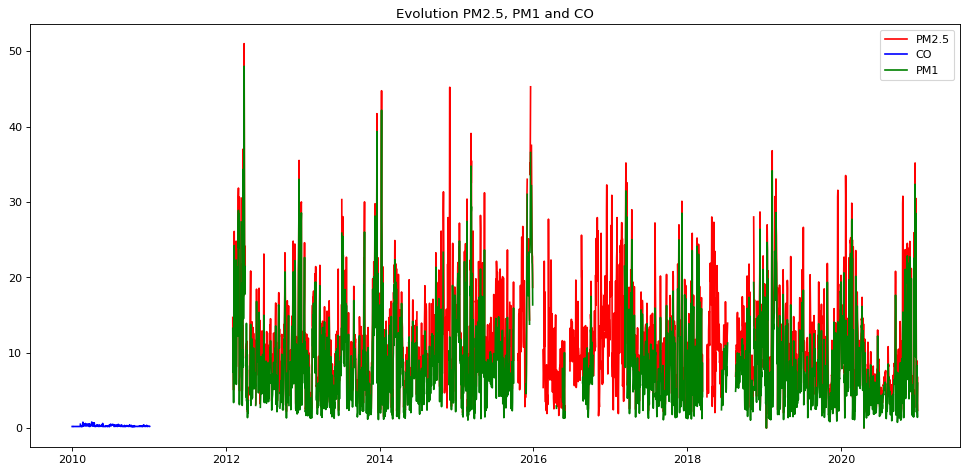

In [7]:
# Let's create a graph to compare feature missing values behaviour
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#Date type object is changed to Datetime
df['data'] = pd.to_datetime(df['data'])
df50 = df[['data','CO','PM1','PM2.5']]
figure(figsize=(15, 7), dpi=80)
plt.plot(df50['data'],df50['PM2.5'], c='r', label='PM2.5')
plt.plot(df50['data'],df50['CO'], c='b', label='CO')
plt.plot(df50['data'],df50['PM1'], c='g', label='PM1')
plt.title('Evolution PM2.5, PM1 and CO')
plt.legend()
plt.show

#### CONCLUSION: Based on seen on graph above, CO data register was stopped by 01/2011, PM2.5 info available is dated from 02/2012 and there are missing PM1 registers from 2016 to middle 2017, so let's remove CO, CO max, PM1 and PM1 max features and to create a new dataset from Feb 2012 in advance.

In [8]:
#Let's delete CO, CO max, PM1 and PM1 max features
df0 = df.drop(['CO','CO max','PM1','PM1 max'], axis=1)

In [9]:
# Let's consider PM2.5 > 0 samples, because it is not possible to get PM2.5 = 0. 
df0 = df0[df0['PM2.5 max']>0]
df0

,data,H2S max,NO max,NO2 max,NOx max,PM10 max,PM2.5 max,SO2 max,H2S,NO,NO2,NOx,PM10,PM2.5,SO2,data_lectura,Pressió atmosfèrica màxima,Pressió atmosfèrica mínima,Humitat relativa màxima,Velocitat del vent a 10 m (esc.),Direcció de vent 10 m (m. 1),Temperatura,Humitat relativa,Pressió atmosfèrica,Precipitació,Irradiància solar global,Temperatura màxima,Temperatura mínima,Humitat relativa mínima,Ratxa màxima del vent a 10 m,Direcció de la ratxa màxima del vent a 10 m,Precipitació màxima en 1 minut,Alert
743,2012-02-03,1.9,12.0,56.0,75.0,29.0,20.0,1.0,1.371429,3.400000,17.900000,22.900000,26.555556,14.666667,1.000000,2012-02-03,1017.964583,1017.591667,32.958333,5.052083,308.125000,2.714583,31.854167,1017.787500,0.00000,149.166667,3.029167,2.393750,30.854167,9.572917,302.041667,0.00000,0
744,2012-02-04,1.4,7.0,37.0,46.0,59.0,14.0,2.0,1.291667,2.583333,12.666667,15.708333,19.666667,9.125000,1.041667,2012-02-04,1023.589583,1023.091667,20.875000,4.885417,257.541667,4.029167,19.562500,1023.345833,0.00000,155.916667,4.433333,3.641667,18.250000,9.700000,286.125000,0.00000,0
745,2012-02-05,2.4,21.0,64.0,95.0,30.0,24.0,4.0,1.595833,4.375000,22.416667,28.500000,15.291667,11.541667,1.166667,2012-02-05,1022.868750,1022.466667,60.604167,2.631250,216.541667,3.562500,58.625000,1022.672917,0.00625,44.104167,3.858333,3.204167,56.833333,5.316667,213.354167,0.00625,0
746,2012-02-06,2.1,14.0,60.0,81.0,24.0,23.0,1.0,1.604545,3.900000,20.800000,26.450000,13.333333,7.458333,1.000000,2012-02-06,1020.218750,1019.852083,45.062500,3.593750,271.000000,7.995833,42.979167,1020.043750,0.00000,162.291667,8.452083,7.497917,41.125000,7.177083,275.854167,0.00000,0
747,2012-02-07,1.8,5.0,42.0,48.0,41.0,9.0,1.0,1.445833,2.521739,13.521739,16.869565,17.541667,5.041667,1.000000,2012-02-07,1016.256250,1015.714583,17.895833,5.885417,314.208333,8.281250,16.812500,1016.004167,0.00000,166.458333,8.608333,7.958333,15.812500,11.408333,305.000000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,2020-12-27,3.1,13.0,44.0,63.0,28.0,24.0,5.0,1.408333,2.833333,13.625000,17.416667,10.458333,8.916667,1.500000,2020-12-27,1009.404167,1008.766667,65.937500,1.931250,217.395833,6.831250,63.083333,1009.087500,0.00000,59.062500,7.322917,6.295833,60.708333,4.272917,240.083333,0.00000,0
3988,2020-12-28,1.6,6.0,27.0,37.0,26.0,6.0,9.0,1.208333,1.541667,7.833333,9.666667,7.541667,3.083333,5.416667,2020-12-28,995.566667,994.956250,49.062500,5.014583,265.958333,10.668750,47.375000,995.262500,0.00000,106.604167,10.983333,10.360417,45.750000,10.270833,269.041667,0.00000,0
3989,2020-12-29,1.5,5.0,15.0,16.0,14.0,9.0,4.0,1.150000,1.250000,6.791667,8.166667,4.708333,3.208333,2.333333,2020-12-29,1001.879167,1001.518750,47.687500,3.875000,258.208333,10.533333,46.104167,1001.689583,0.00000,91.479167,10.879167,10.147917,44.708333,8.314583,270.229167,0.00000,0
3990,2020-12-30,1.3,3.0,20.0,25.0,42.0,5.0,1.0,1.120833,1.208333,5.458333,6.916667,7.500000,2.250000,1.000000,2020-12-30,1010.639583,1010.081250,49.250000,6.022917,295.020833,9.764583,48.312500,1010.368750,0.00000,77.208333,9.947917,9.558333,47.354167,12.089583,293.333333,0.00000,0


In [10]:
#Let's check new shape
df0.shape

(3063, 33)

In [11]:
#To look for values missed
df0.isna().sum().sort_values(ascending = False)

NOx max                                        52
NOx                                            52
NO                                             37
NO max                                         37
NO2 max                                        37
NO2                                            37
H2S                                            24
H2S max                                        24
SO2                                            17
SO2 max                                        17
Temperatura màxima                              5
Temperatura                                     5
Temperatura mínima                              5
Humitat relativa màxima                         4
Irradiància solar global                        4
Pressió atmosfèrica                             4
Humitat relativa                                4
Direcció de vent 10 m (m. 1)                    4
Pressió atmosfèrica màxima                      4
Pressió atmosfèrica mínima                      4


In [12]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3063 entries, 743 to 3991
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   data                                         3063 non-null   datetime64[ns]
 1   H2S max                                      3039 non-null   float64       
 2   NO max                                       3026 non-null   float64       
 3   NO2 max                                      3026 non-null   float64       
 4   NOx max                                      3011 non-null   float64       
 5   PM10 max                                     3061 non-null   float64       
 6   PM2.5 max                                    3063 non-null   float64       
 7   SO2 max                                      3046 non-null   float64       
 8   H2S                                          3039 non-null   float64       


In [13]:
# NA data strategies to be managed. Drop or fill. 
dfA = df0.dropna()
dfB = df0.fillna(method = 'ffill')

In [14]:
print(dfA['Alert'].value_counts())
print(dfB['Alert'].value_counts()) 

0    2122
1     856
Name: Alert, dtype: int64
0    2191
1     872
Name: Alert, dtype: int64


#### NOTA: I compare impact on deleting NA data by removing or fill, in comparison with Alert feature, due to an unbalanced dataset I have, let's prioritize to fill data in order not to lose Data.

In [15]:
#I can fill forward and backward methods, so let's use forward method to remove last NAN in dataset because backward filling NAN's in last raw cannot be filled, unless we increase data window. (not the case).
df0 = df0.fillna(method = 'ffill')

In [16]:
#Let's change Alert type data
df0['Alert']=df0['Alert'].astype('int')

In [17]:
#Check dataframe
df0

,data,H2S max,NO max,NO2 max,NOx max,PM10 max,PM2.5 max,SO2 max,H2S,NO,NO2,NOx,PM10,PM2.5,SO2,data_lectura,Pressió atmosfèrica màxima,Pressió atmosfèrica mínima,Humitat relativa màxima,Velocitat del vent a 10 m (esc.),Direcció de vent 10 m (m. 1),Temperatura,Humitat relativa,Pressió atmosfèrica,Precipitació,Irradiància solar global,Temperatura màxima,Temperatura mínima,Humitat relativa mínima,Ratxa màxima del vent a 10 m,Direcció de la ratxa màxima del vent a 10 m,Precipitació màxima en 1 minut,Alert
743,2012-02-03,1.9,12.0,56.0,75.0,29.0,20.0,1.0,1.371429,3.400000,17.900000,22.900000,26.555556,14.666667,1.000000,2012-02-03,1017.964583,1017.591667,32.958333,5.052083,308.125000,2.714583,31.854167,1017.787500,0.00000,149.166667,3.029167,2.393750,30.854167,9.572917,302.041667,0.00000,0
744,2012-02-04,1.4,7.0,37.0,46.0,59.0,14.0,2.0,1.291667,2.583333,12.666667,15.708333,19.666667,9.125000,1.041667,2012-02-04,1023.589583,1023.091667,20.875000,4.885417,257.541667,4.029167,19.562500,1023.345833,0.00000,155.916667,4.433333,3.641667,18.250000,9.700000,286.125000,0.00000,0
745,2012-02-05,2.4,21.0,64.0,95.0,30.0,24.0,4.0,1.595833,4.375000,22.416667,28.500000,15.291667,11.541667,1.166667,2012-02-05,1022.868750,1022.466667,60.604167,2.631250,216.541667,3.562500,58.625000,1022.672917,0.00625,44.104167,3.858333,3.204167,56.833333,5.316667,213.354167,0.00625,0
746,2012-02-06,2.1,14.0,60.0,81.0,24.0,23.0,1.0,1.604545,3.900000,20.800000,26.450000,13.333333,7.458333,1.000000,2012-02-06,1020.218750,1019.852083,45.062500,3.593750,271.000000,7.995833,42.979167,1020.043750,0.00000,162.291667,8.452083,7.497917,41.125000,7.177083,275.854167,0.00000,0
747,2012-02-07,1.8,5.0,42.0,48.0,41.0,9.0,1.0,1.445833,2.521739,13.521739,16.869565,17.541667,5.041667,1.000000,2012-02-07,1016.256250,1015.714583,17.895833,5.885417,314.208333,8.281250,16.812500,1016.004167,0.00000,166.458333,8.608333,7.958333,15.812500,11.408333,305.000000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,2020-12-27,3.1,13.0,44.0,63.0,28.0,24.0,5.0,1.408333,2.833333,13.625000,17.416667,10.458333,8.916667,1.500000,2020-12-27,1009.404167,1008.766667,65.937500,1.931250,217.395833,6.831250,63.083333,1009.087500,0.00000,59.062500,7.322917,6.295833,60.708333,4.272917,240.083333,0.00000,0
3988,2020-12-28,1.6,6.0,27.0,37.0,26.0,6.0,9.0,1.208333,1.541667,7.833333,9.666667,7.541667,3.083333,5.416667,2020-12-28,995.566667,994.956250,49.062500,5.014583,265.958333,10.668750,47.375000,995.262500,0.00000,106.604167,10.983333,10.360417,45.750000,10.270833,269.041667,0.00000,0
3989,2020-12-29,1.5,5.0,15.0,16.0,14.0,9.0,4.0,1.150000,1.250000,6.791667,8.166667,4.708333,3.208333,2.333333,2020-12-29,1001.879167,1001.518750,47.687500,3.875000,258.208333,10.533333,46.104167,1001.689583,0.00000,91.479167,10.879167,10.147917,44.708333,8.314583,270.229167,0.00000,0
3990,2020-12-30,1.3,3.0,20.0,25.0,42.0,5.0,1.0,1.120833,1.208333,5.458333,6.916667,7.500000,2.250000,1.000000,2020-12-30,1010.639583,1010.081250,49.250000,6.022917,295.020833,9.764583,48.312500,1010.368750,0.00000,77.208333,9.947917,9.558333,47.354167,12.089583,293.333333,0.00000,0


In [18]:
#Let's confirm features type
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3063 entries, 743 to 3991
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   data                                         3063 non-null   datetime64[ns]
 1   H2S max                                      3063 non-null   float64       
 2   NO max                                       3063 non-null   float64       
 3   NO2 max                                      3063 non-null   float64       
 4   NOx max                                      3063 non-null   float64       
 5   PM10 max                                     3063 non-null   float64       
 6   PM2.5 max                                    3063 non-null   float64       
 7   SO2 max                                      3063 non-null   float64       
 8   H2S                                          3063 non-null   float64       


In [19]:
#Let's create some graphs interesting for FrontEnd summarized by years, in order to provide some pollutant's information for user 
df66=df0.groupby(df0['data'].dt.year).mean()
df66

,H2S max,NO max,NO2 max,NOx max,PM10 max,PM2.5 max,SO2 max,H2S,NO,NO2,NOx,PM10,PM2.5,SO2,Pressió atmosfèrica màxima,Pressió atmosfèrica mínima,Humitat relativa màxima,Velocitat del vent a 10 m (esc.),Direcció de vent 10 m (m. 1),Temperatura,Humitat relativa,Pressió atmosfèrica,Precipitació,Irradiància solar global,Temperatura màxima,Temperatura mínima,Humitat relativa mínima,Ratxa màxima del vent a 10 m,Direcció de la ratxa màxima del vent a 10 m,Precipitació màxima en 1 minut,Alert
data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012,2.422082,21.044164,51.889590,80.750789,34.880126,20.908517,6.271293,1.483850,4.620920,21.863747,28.407204,18.754260,11.616185,2.107521,1015.922780,1015.622135,70.559427,2.369237,169.045837,17.720831,68.488258,1015.773970,0.026656,210.035607,18.112342,17.349750,66.364770,4.649357,169.368814,0.004397,0.296530
2013,2.476519,19.533149,45.254144,71.638122,30.762431,19.292818,2.925414,1.562165,4.672305,18.868821,25.466330,15.533681,9.827055,1.478884,1015.201571,1014.883892,68.009151,2.604443,180.880755,16.732637,66.187615,1015.046196,0.035963,201.798343,17.119866,16.364416,64.330974,5.157592,181.944947,0.005122,0.273481
2014,2.900556,25.891667,48.011111,84.644444,30.266667,20.561111,6.463889,1.875456,5.845098,20.594331,29.948544,16.515508,10.998351,3.359932,1014.800822,1014.490382,72.159722,2.401158,162.817297,17.274317,70.386285,1014.648466,0.031476,195.194097,17.641765,16.922650,68.605845,4.759038,162.771925,0.005828,0.300000
2015,3.549550,26.672673,52.081081,88.303303,39.084084,23.729730,5.783784,1.782203,6.404812,23.122739,32.458423,22.282271,13.696468,2.990940,1018.478166,1018.178691,70.410723,2.351038,164.411207,17.284453,68.569132,1018.329073,0.025507,207.390328,17.664915,16.921034,66.702578,4.646324,162.208625,0.004392,0.378378
2016,3.040476,21.952381,40.544218,70.125850,33.595238,19.040816,6.887755,1.777953,5.826332,18.764996,27.206466,17.232000,10.481345,3.286824,1016.926377,1016.638607,71.962782,2.287050,156.085242,17.799526,69.958648,1016.788287,0.025716,204.612741,18.174946,17.415870,67.949939,4.557771,156.595509,0.004932,0.227891
2017,3.133151,19.923288,49.106849,75.539726,36.915068,20.890411,6.328767,1.643339,5.043679,22.437935,29.522541,19.145392,11.583118,3.325518,1017.957363,1017.659378,69.273052,2.297795,168.729218,17.292405,67.206735,1017.808995,0.015805,204.547888,17.696599,16.918665,65.183404,4.578494,168.079110,0.003339,0.293151
2018,2.962171,22.286184,52.394737,83.832237,37.703947,20.250000,4.891447,1.646755,4.951121,22.096756,29.237562,19.196313,11.147602,2.626252,1015.372766,1015.070367,71.605469,2.321978,167.755071,16.720285,69.595600,1015.222718,0.046395,183.181812,17.102255,16.357353,67.557155,4.655332,167.418586,0.008141,0.279605
2019,2.777961,16.556474,47.363636,69.939394,38.853994,19.732782,7.126722,1.423804,3.598965,18.260422,23.205922,19.385099,10.524039,3.308902,1015.910451,1015.599306,69.637339,2.419381,168.588499,17.183626,67.507289,1015.756503,0.020655,199.698290,17.576900,16.807782,65.345099,4.881548,167.245064,0.003937,0.256198
2020,2.156438,14.871233,38.764384,59.312329,33.701370,18.641096,3.934247,1.258778,3.567747,15.889818,20.977562,15.229841,9.429262,2.415301,1017.259587,1016.963161,74.188216,2.297740,160.911025,17.325285,72.007406,1017.112548,0.029612,192.288341,17.688207,16.978432,69.813550,4.618169,158.344678,0.005896,0.254795


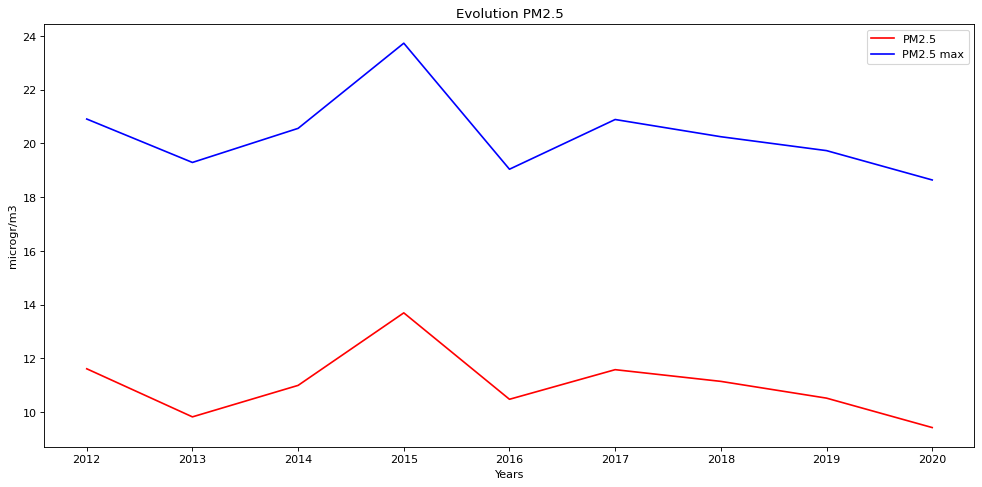

In [20]:
# Pollutant PM2.5
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 7), dpi=80)
plt.plot(df66['PM2.5'],c='r', label='PM2.5')
plt.plot(df66['PM2.5 max'],c='b',label='PM2.5 max')
plt.xlabel('Years')
plt.ylabel('microgr/m3')
plt.title('Evolution PM2.5')
plt.legend()
plt.savefig("FrontEnd_docs_related/PM2.5.jpg", bbox_inches='tight');

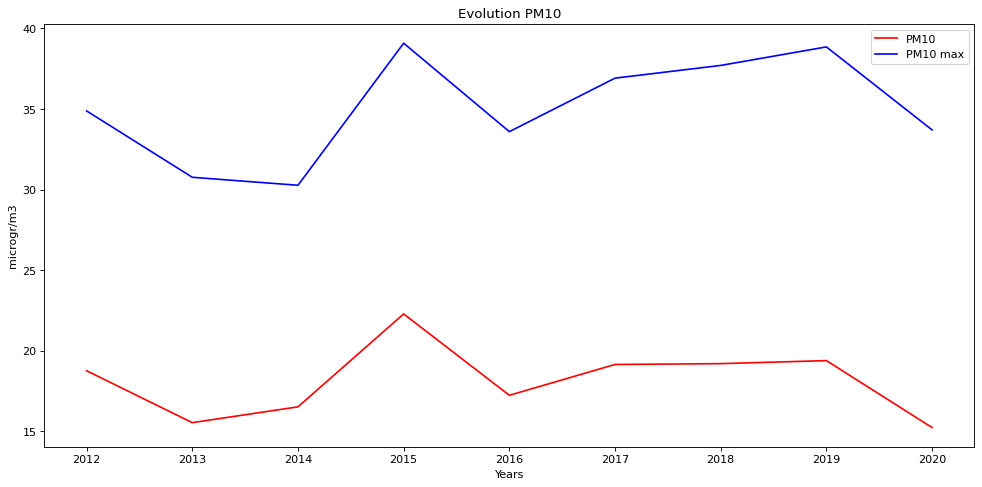

In [21]:
#Pollutant PM10
figure(figsize=(15, 7), dpi=80)
plt.plot(df66['PM10'],c='r', label='PM10')
plt.plot(df66['PM10 max'],c='b',label='PM10 max')
plt.xlabel('Years')
plt.ylabel('microgr/m3')
plt.title('Evolution PM10')
plt.legend()
plt.savefig("FrontEnd_docs_related/PM10.jpg", bbox_inches='tight');

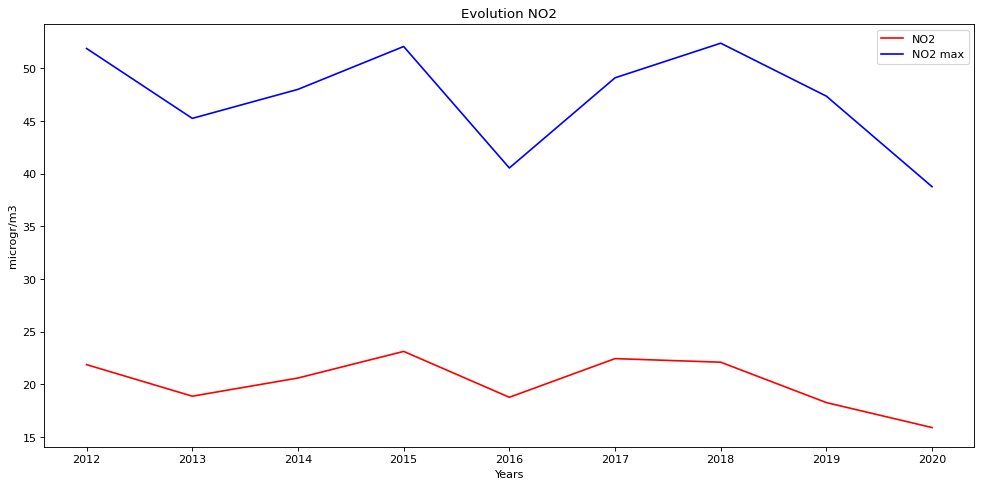

In [22]:
#Pollutant NO2
figure(figsize=(15, 7), dpi=80)
plt.plot(df66['NO2'],c='r', label='NO2')
plt.plot(df66['NO2 max'],c='b',label='NO2 max')
plt.xlabel('Years')
plt.ylabel('microgr/m3')
plt.title('Evolution NO2')
plt.legend()
plt.savefig("FrontEnd_docs_related/NO2.jpg", bbox_inches='tight');

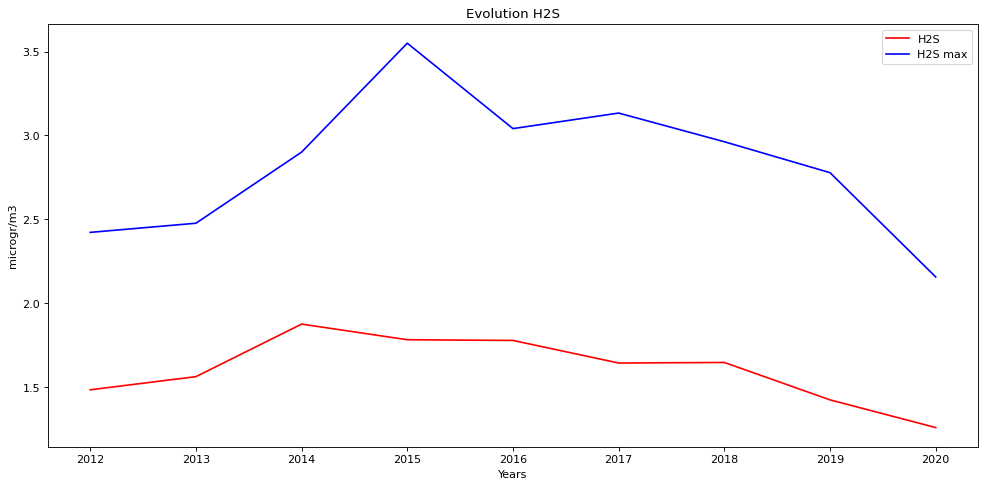

In [23]:
# Pollutant H2S
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 7), dpi=80)
plt.plot(df66['H2S'],c='r', label='H2S')
plt.plot(df66['H2S max'],c='b',label='H2S max')
plt.xlabel('Years')
plt.ylabel('microgr/m3')
plt.title('Evolution H2S')
plt.legend()
plt.savefig("FrontEnd_docs_related/H2S.jpg", bbox_inches='tight');

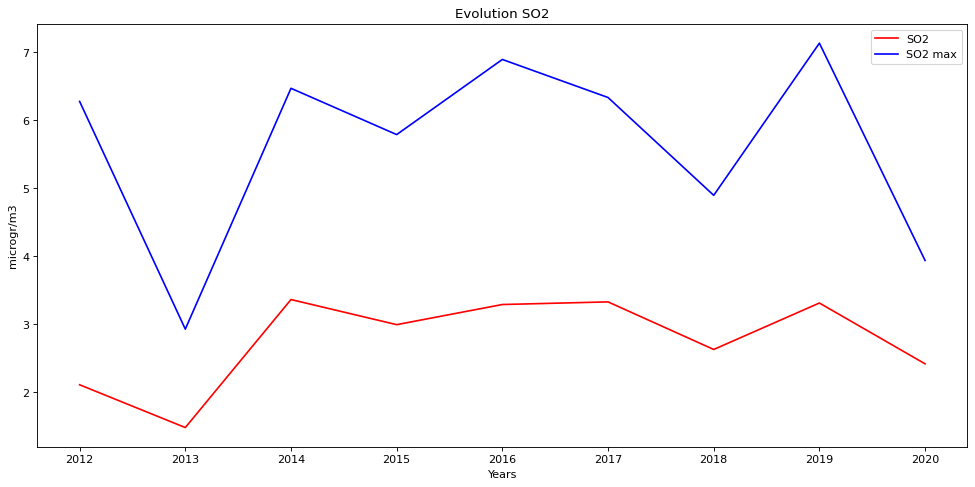

In [24]:
# Pollutant SO2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 7), dpi=80)
plt.plot(df66['SO2'],c='r', label='SO2')
plt.plot(df66['SO2 max'],c='b',label='SO2 max')
plt.xlabel('Years')
plt.ylabel('microgr/m3')
plt.title('Evolution SO2')
plt.legend()
plt.savefig("FrontEnd_docs_related/SO2.jpg", bbox_inches='tight');

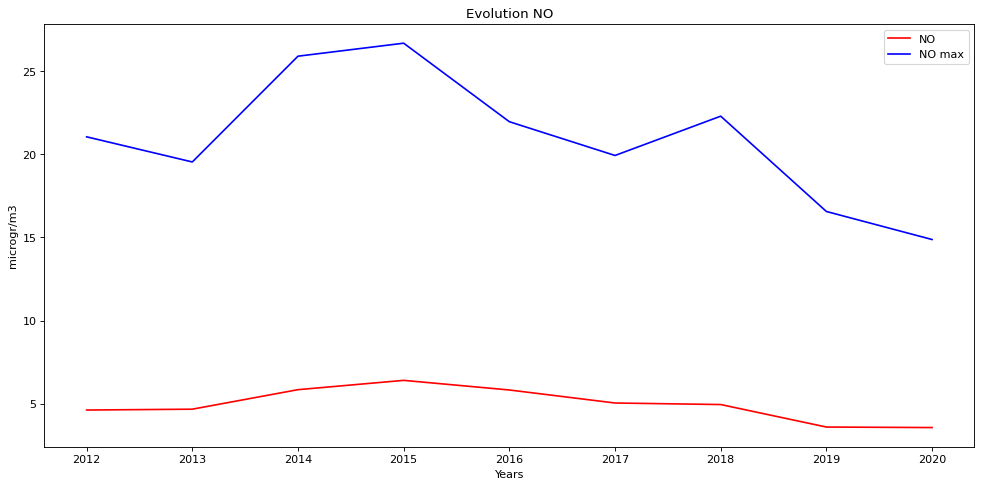

In [25]:
# Pollutant NO
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 7), dpi=80)
plt.plot(df66['NO'],c='r', label='NO')
plt.plot(df66['NO max'],c='b',label='NO max')
plt.xlabel('Years')
plt.ylabel('microgr/m3')
plt.title('Evolution NO')
plt.legend()
plt.savefig("FrontEnd_docs_related/NO.jpg", bbox_inches='tight');

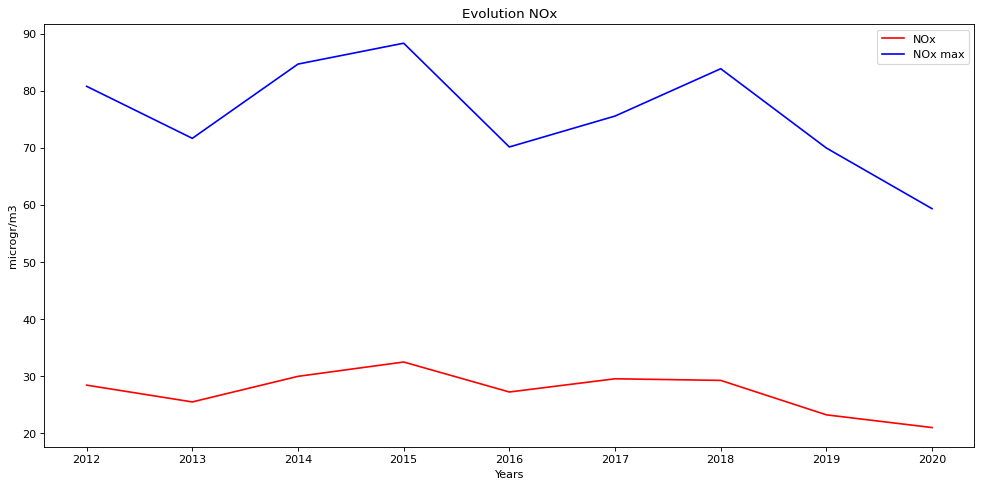

In [26]:
# Pollutant NOx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 7), dpi=80)
plt.plot(df66['NOx'],c='r', label='NOx')
plt.plot(df66['NOx max'],c='b',label='NOx max')
plt.xlabel('Years')
plt.ylabel('microgr/m3')
plt.title('Evolution NOx')
plt.legend()
plt.savefig("FrontEnd_docs_related/NOx.jpg", bbox_inches='tight');

In [27]:
# Review values status and quartiles in order to find inconsistency data
df0.describe()

,H2S max,NO max,NO2 max,NOx max,PM10 max,PM2.5 max,SO2 max,H2S,NO,NO2,NOx,PM10,PM2.5,SO2,Pressió atmosfèrica màxima,Pressió atmosfèrica mínima,Humitat relativa màxima,Velocitat del vent a 10 m (esc.),Direcció de vent 10 m (m. 1),Temperatura,Humitat relativa,Pressió atmosfèrica,Precipitació,Irradiància solar global,Temperatura màxima,Temperatura mínima,Humitat relativa mínima,Ratxa màxima del vent a 10 m,Direcció de la ratxa màxima del vent a 10 m,Precipitació màxima en 1 minut,Alert
count,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.00000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000,3063.000000
mean,2.815540,20.856676,47.199478,75.781587,35.038198,20.32713,5.597453,1.601034,4.917049,20.152673,27.279541,18.093212,11.008876,2.765340,1016.425521,1016.122476,70.838315,2.375138,166.775201,17.250518,68.849654,1016.276049,0.028414,199.850559,17.633315,16.884497,66.844376,4.729142,166.162690,0.005071,0.284688
std,1.781291,24.134056,22.620814,51.230926,19.259940,12.02200,6.754843,0.641040,5.132810,9.881732,16.690552,8.956376,6.464967,2.185953,6.688192,6.729879,12.499852,1.170456,63.700290,5.917196,12.545302,6.704397,0.136884,96.600553,5.914163,5.932043,12.556276,2.243170,62.888680,0.018746,0.451339
min,1.000000,0.000000,0.000000,0.000000,4.000000,2.00000,0.000000,0.795238,0.000000,0.000000,0.000000,2.791667,1.208333,0.000000,986.314583,985.758333,17.895833,0.739130,22.062500,2.714583,16.812500,986.027083,0.000000,0.000000,3.029167,2.393750,15.812500,1.813043,33.729167,0.000000,0.000000
25%,1.700000,5.000000,32.000000,41.000000,23.000000,12.00000,1.000000,1.158333,1.916667,12.744565,15.416667,11.625000,6.250000,1.000000,1012.780208,1012.469792,62.739583,1.660417,119.093750,12.185417,60.395833,1012.627083,0.000000,113.708333,12.570833,11.796875,58.020833,3.275000,118.208333,0.000000,0.000000
50%,2.400000,13.000000,45.000000,63.000000,32.000000,18.00000,4.000000,1.425000,3.041667,18.666667,23.125000,16.958333,9.863636,1.958333,1016.435417,1016.160417,73.458333,1.977083,157.604167,16.800000,71.354167,1016.300000,0.000000,194.145833,17.160417,16.450000,69.083333,3.918750,153.104167,0.000000,0.000000
75%,3.400000,27.000000,60.000000,98.000000,43.000000,26.00000,7.000000,1.816667,5.708333,26.333333,35.183333,22.808877,14.148551,3.833333,1020.253125,1019.965625,80.025568,2.729167,214.395833,22.553125,78.145833,1020.126042,0.000000,286.604167,22.930208,22.175000,76.229167,5.523958,212.843750,0.000000,1.000000
max,28.300000,200.000000,396.000000,421.000000,263.000000,141.00000,144.000000,6.637500,48.708333,61.888889,125.541667,78.666667,51.000000,22.000000,1039.285417,1038.897917,99.375000,8.758333,314.208333,29.443750,99.041667,1039.106250,2.233333,376.979167,29.906250,29.012500,98.604167,16.502083,315.854167,0.279167,1.000000


#### NOTA: Quartiles are quite regular and well distributed

In [28]:
#Let's reset index and delete DATA column, once merged, date is not relevant. 
df0 = df0.reset_index()
df0 = df0.drop(['index','data','data_lectura'], axis=1)
df0

,H2S max,NO max,NO2 max,NOx max,PM10 max,PM2.5 max,SO2 max,H2S,NO,NO2,NOx,PM10,PM2.5,SO2,Pressió atmosfèrica màxima,Pressió atmosfèrica mínima,Humitat relativa màxima,Velocitat del vent a 10 m (esc.),Direcció de vent 10 m (m. 1),Temperatura,Humitat relativa,Pressió atmosfèrica,Precipitació,Irradiància solar global,Temperatura màxima,Temperatura mínima,Humitat relativa mínima,Ratxa màxima del vent a 10 m,Direcció de la ratxa màxima del vent a 10 m,Precipitació màxima en 1 minut,Alert
0,1.9,12.0,56.0,75.0,29.0,20.0,1.0,1.371429,3.400000,17.900000,22.900000,26.555556,14.666667,1.000000,1017.964583,1017.591667,32.958333,5.052083,308.125000,2.714583,31.854167,1017.787500,0.00000,149.166667,3.029167,2.393750,30.854167,9.572917,302.041667,0.00000,0
1,1.4,7.0,37.0,46.0,59.0,14.0,2.0,1.291667,2.583333,12.666667,15.708333,19.666667,9.125000,1.041667,1023.589583,1023.091667,20.875000,4.885417,257.541667,4.029167,19.562500,1023.345833,0.00000,155.916667,4.433333,3.641667,18.250000,9.700000,286.125000,0.00000,0
2,2.4,21.0,64.0,95.0,30.0,24.0,4.0,1.595833,4.375000,22.416667,28.500000,15.291667,11.541667,1.166667,1022.868750,1022.466667,60.604167,2.631250,216.541667,3.562500,58.625000,1022.672917,0.00625,44.104167,3.858333,3.204167,56.833333,5.316667,213.354167,0.00625,0
3,2.1,14.0,60.0,81.0,24.0,23.0,1.0,1.604545,3.900000,20.800000,26.450000,13.333333,7.458333,1.000000,1020.218750,1019.852083,45.062500,3.593750,271.000000,7.995833,42.979167,1020.043750,0.00000,162.291667,8.452083,7.497917,41.125000,7.177083,275.854167,0.00000,0
4,1.8,5.0,42.0,48.0,41.0,9.0,1.0,1.445833,2.521739,13.521739,16.869565,17.541667,5.041667,1.000000,1016.256250,1015.714583,17.895833,5.885417,314.208333,8.281250,16.812500,1016.004167,0.00000,166.458333,8.608333,7.958333,15.812500,11.408333,305.000000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,3.1,13.0,44.0,63.0,28.0,24.0,5.0,1.408333,2.833333,13.625000,17.416667,10.458333,8.916667,1.500000,1009.404167,1008.766667,65.937500,1.931250,217.395833,6.831250,63.083333,1009.087500,0.00000,59.062500,7.322917,6.295833,60.708333,4.272917,240.083333,0.00000,0
3059,1.6,6.0,27.0,37.0,26.0,6.0,9.0,1.208333,1.541667,7.833333,9.666667,7.541667,3.083333,5.416667,995.566667,994.956250,49.062500,5.014583,265.958333,10.668750,47.375000,995.262500,0.00000,106.604167,10.983333,10.360417,45.750000,10.270833,269.041667,0.00000,0
3060,1.5,5.0,15.0,16.0,14.0,9.0,4.0,1.150000,1.250000,6.791667,8.166667,4.708333,3.208333,2.333333,1001.879167,1001.518750,47.687500,3.875000,258.208333,10.533333,46.104167,1001.689583,0.00000,91.479167,10.879167,10.147917,44.708333,8.314583,270.229167,0.00000,0
3061,1.3,3.0,20.0,25.0,42.0,5.0,1.0,1.120833,1.208333,5.458333,6.916667,7.500000,2.250000,1.000000,1010.639583,1010.081250,49.250000,6.022917,295.020833,9.764583,48.312500,1010.368750,0.00000,77.208333,9.947917,9.558333,47.354167,12.089583,293.333333,0.00000,0


## 2.2 DATA distribution

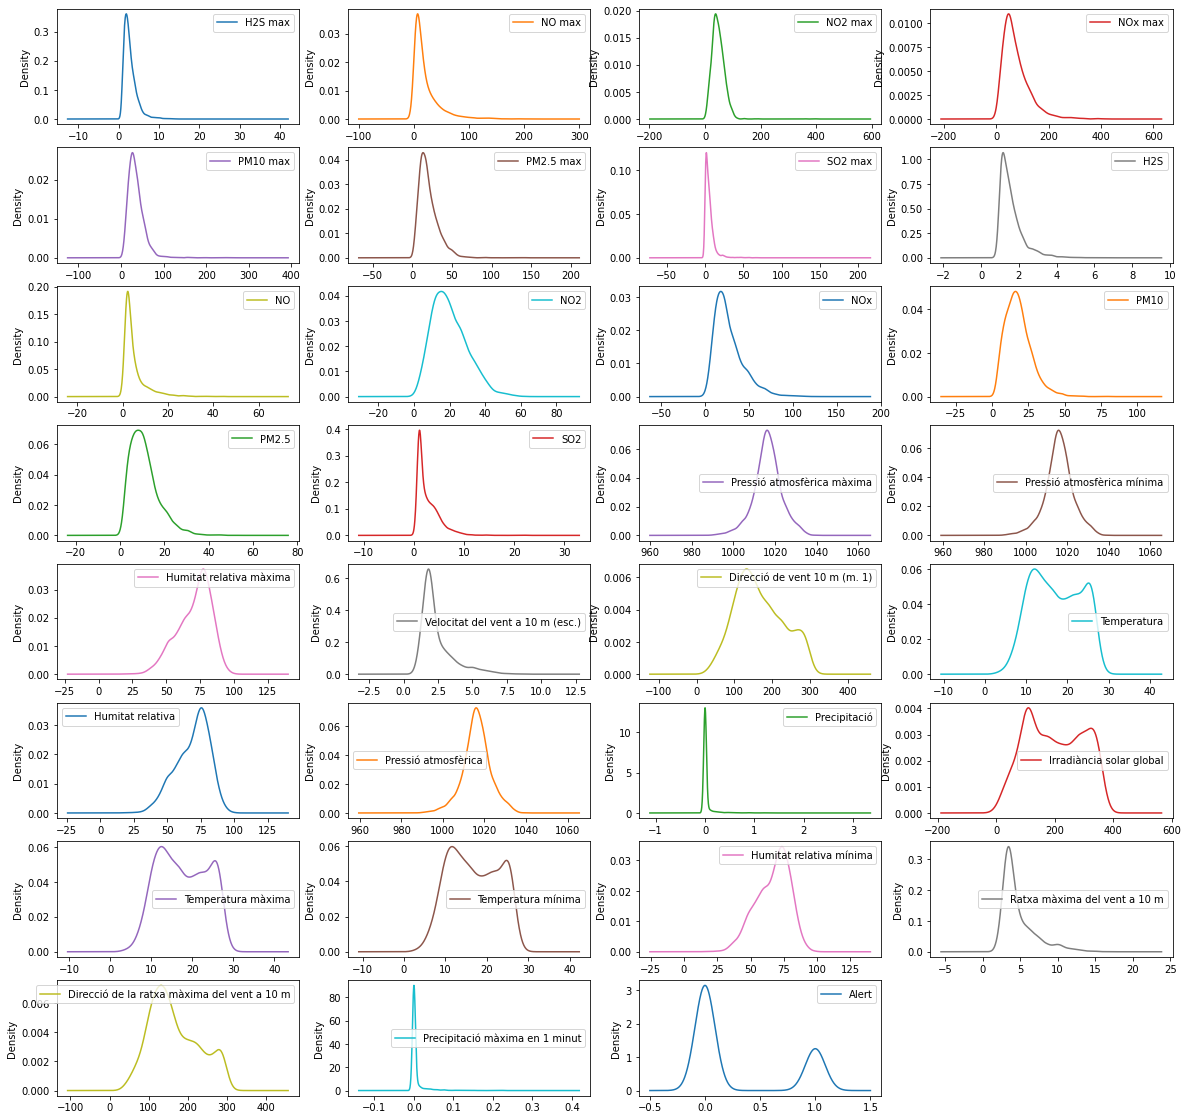

In [29]:
#Density Plots
df0.plot(kind='density', subplots=True, layout=(8,4), sharex=False, figsize=(20,20))
plt.show()

#### NOTA: Quite good regular and distributed graphs

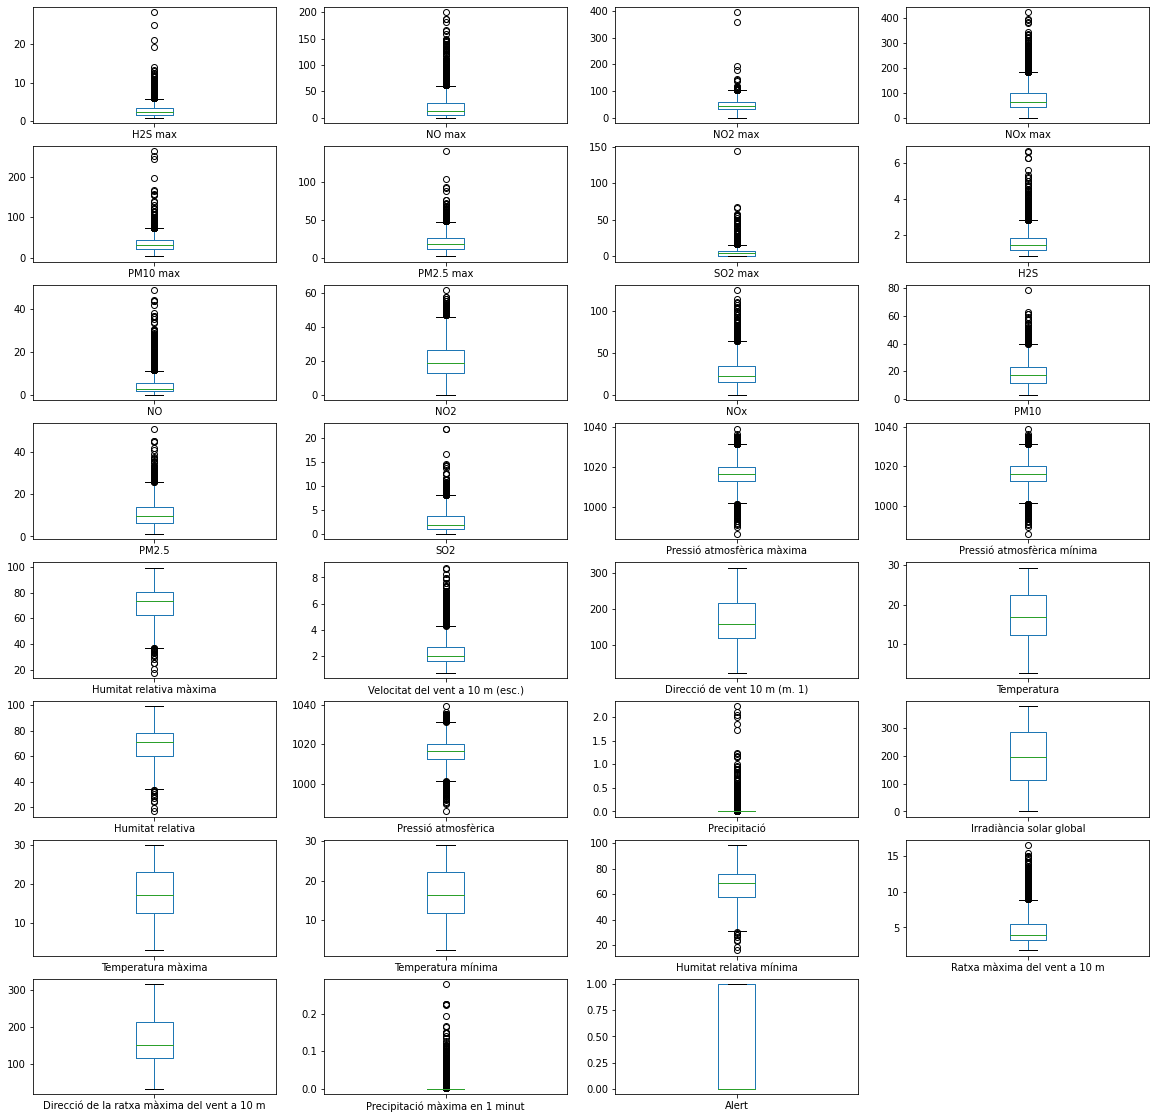

In [30]:
# Feature Distribution BoxPlot
df0.plot(kind='box', subplots=True, layout=(8,4), sharex=False, sharey=False, figsize=(20,20))
plt.show()

#### NOTA: Having a look in Boxplots, it seems that there will be many outliers, so let's review later the impact of these

## 2.3 CORRELATION

<AxesSubplot:>

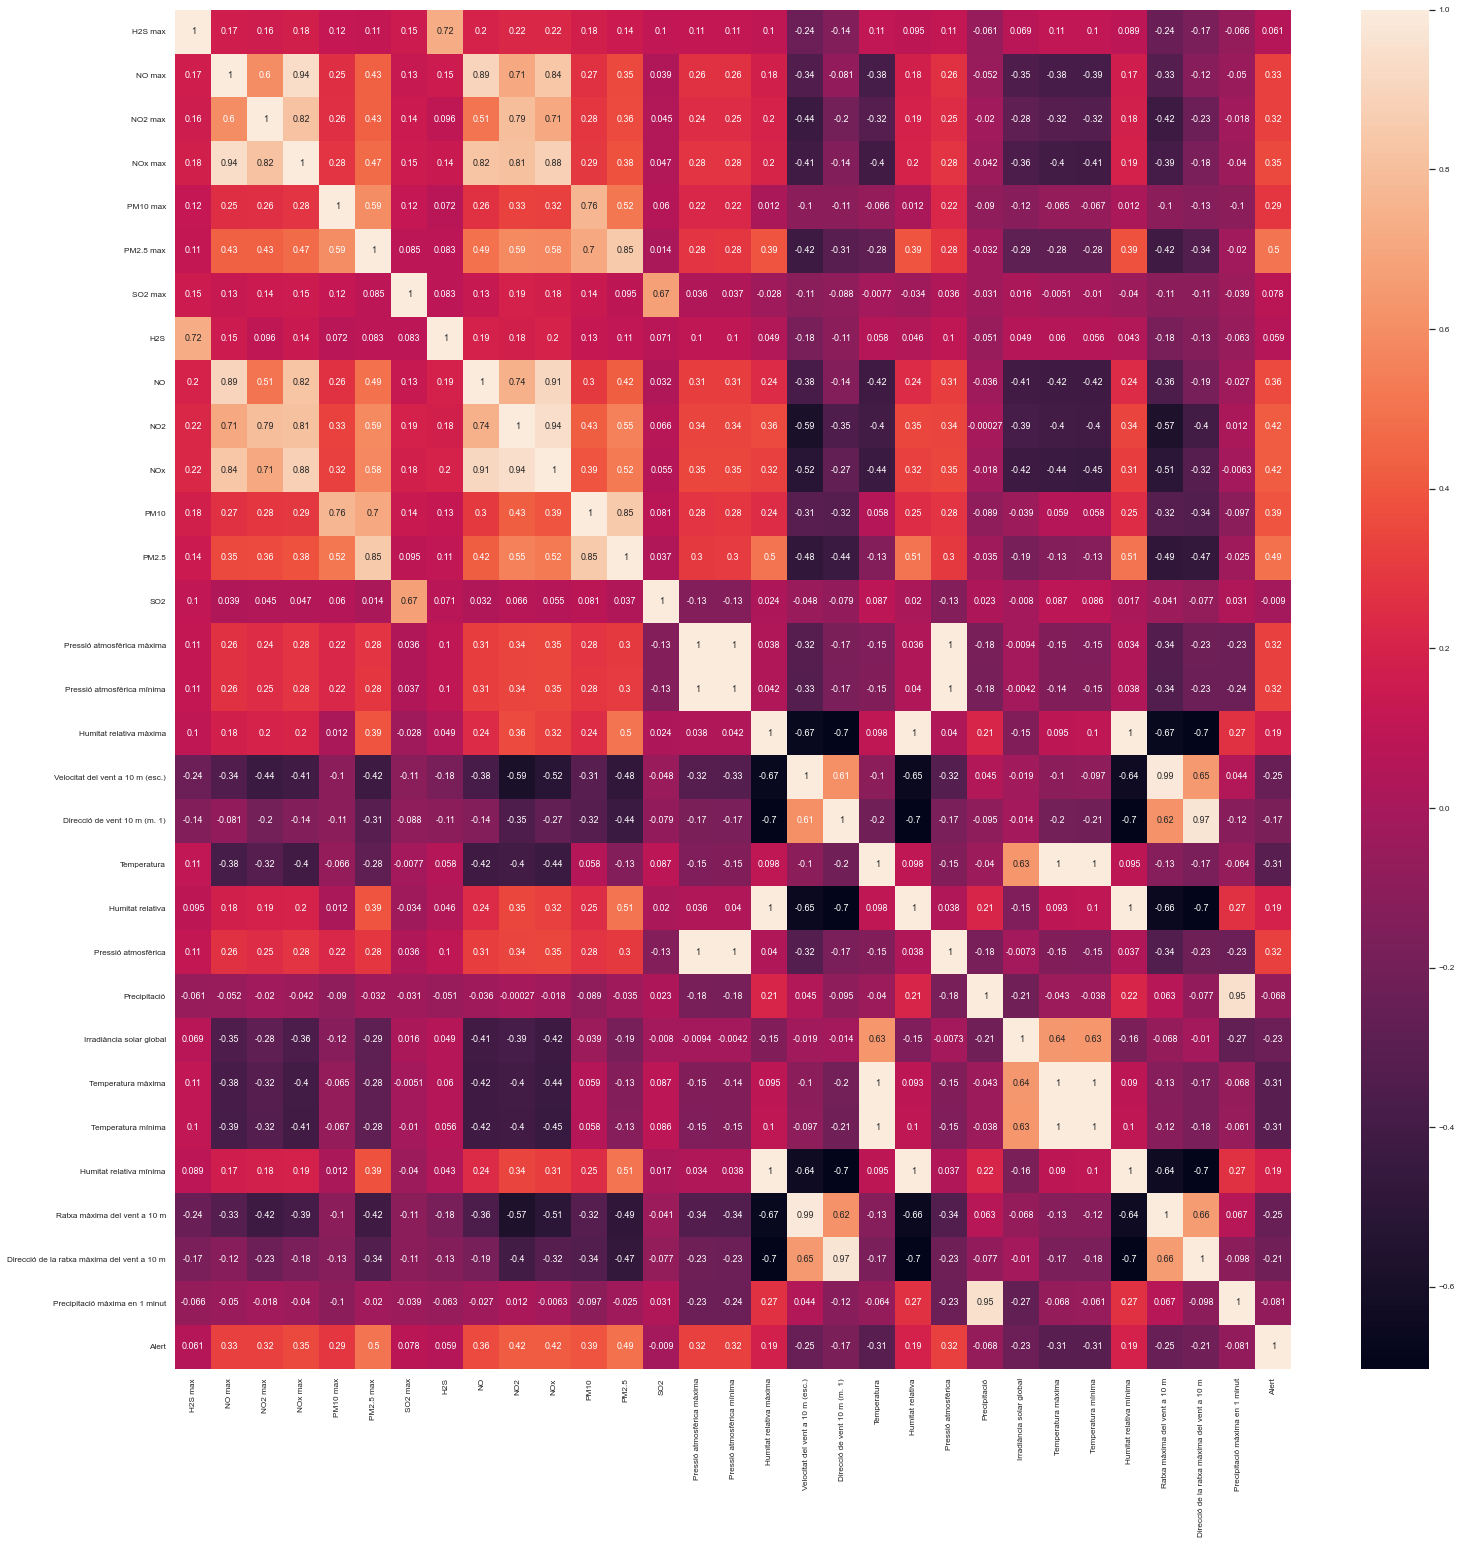

In [31]:
import seaborn as sns
corr = df0.corr()
top_features = corr.index
plt.figure(figsize=(25,25))
sns.set(font_scale = 0.75)
sns.heatmap(df0[top_features].corr(), annot=True)

#### NOTA:There are correlated features, that we need to analyse for removing or keeping based on their impact into Alert feature. Any feature with average, max and min value will be highly correlated. 

In [32]:
corr = df0.corr()
corr[['Alert']].sort_values(by = 'Alert',ascending = False)\
.style.background_gradient()

,Alert
Alert,1.000000
PM2.5 max,0.504004
PM2.5,0.490586
NO2,0.416666
NOx,0.415268
PM10,0.388281
NO,0.356290
NOx max,0.351526
NO max,0.325844
NO2 max,0.320647


#### NOTA: As expected, Target is correlated with PM2.5, other pollutants and few meteorological features.

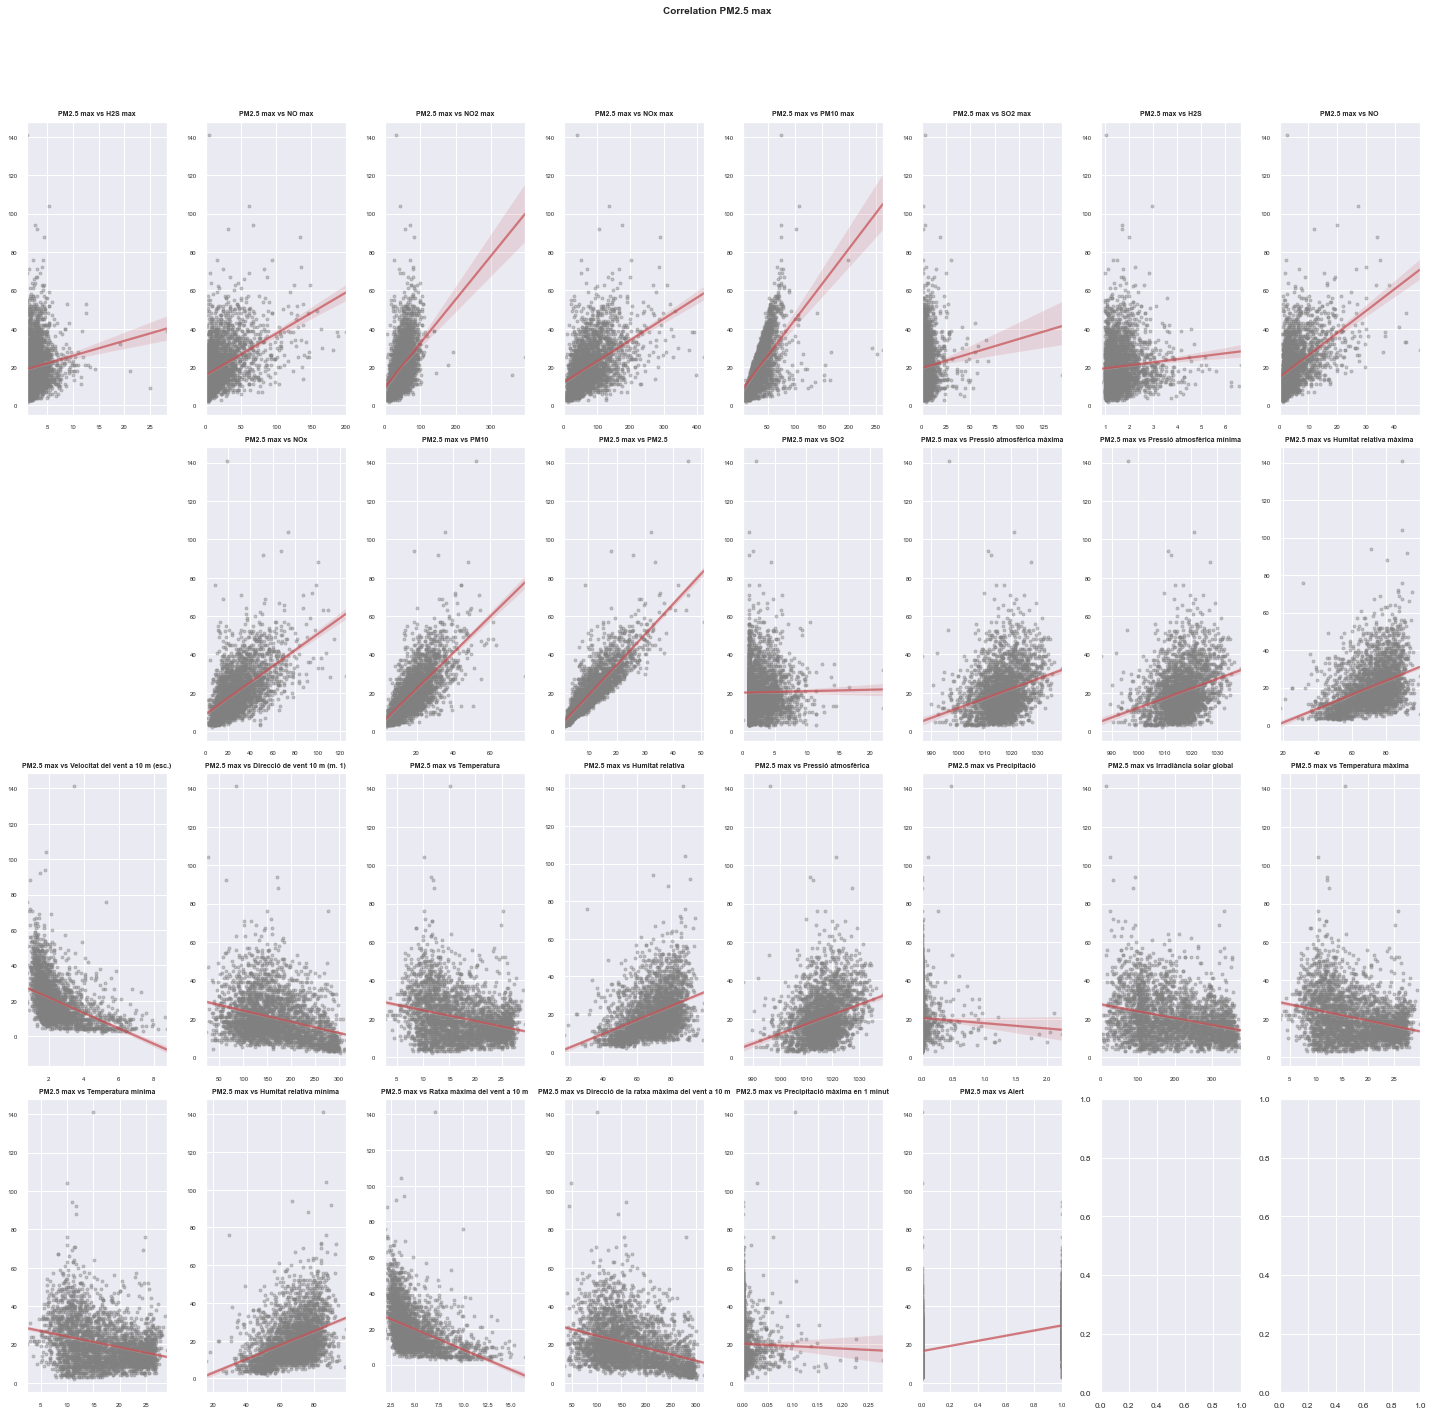

In [33]:
# Distribution graph between PM2.5 max against other features. 
#It is not considered Alert feature, because is directly related to PM2.5 max, and its binary result won't let us see feature relations clearly.
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(20, 20))
axes = axes.flat
columnas_numeric = df0.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('PM2.5 max')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df0[colum],
        y           = df0['PM2.5 max'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"PM2.5 max vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Delete empty axes
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation PM2.5 max', fontsize = 10, fontweight = "bold");

#### NOTA: As expected, the behaviour between 1 feature and max feature is the same, as well as for min, max average meteorological and pollutant features.

## 2.4 OUTLIERS

In [34]:
# Let's check Outliers in our df0 based on KNN method
from pyod.models.knn import KNN
from sklearn import model_selection


#method KNN

clf = KNN(contamination=0.18)
clf.fit(df0)
y_pred = clf.predict(df0)
error = (y_pred).sum()
msg = "%s: %f " % ('KNN',error)
print(msg)

KNN: 477.000000 


In [35]:
#Let's compare how many Alert = 1 values we lose if outliers were removed
print(df0['Alert'].value_counts())
print(df0[y_pred!=1]['Alert'].value_counts())

0    2191
1     872
Name: Alert, dtype: int64
0    1956
1     630
Name: Alert, dtype: int64


#### NOTA: There are too many outliers, once removed, we lose around 30% Alert data. Despite it is better not to lose data due to not too many, let's see later if they will/will not be removed. 

# 3. Base Model

#### NOTA: Let's  create a Base Model with a simple Logistic Regression, firstly to compare removing or not outliers.

In [36]:
# Import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, accuracy_score, confusion_matrix, precision_score, roc_auc_score, classification_report

In [96]:
#Let's create 2 metric evaluate functions. 
#A full version to be used at the end, in selection model, tuning and oversampling, and a partial version for the rest of analysis
def full_evaluate(y_test, test_predictions):
    f1=f1_score(y_test, test_predictions)
    recall=recall_score(y_test, test_predictions)
    accuracy=accuracy_score(y_test, test_predictions)
    precision=precision_score(y_test, test_predictions)
    roc=roc_auc_score(y_test, test_predictions)
    cm=confusion_matrix(y_test, test_predictions)
    
    return f1, recall, accuracy, precision, roc, cm

In [108]:
def partial_evaluate(y_test, test_predictions):
    f1=f1_score(y_test, test_predictions)
    accuracy=accuracy_score(y_test, test_predictions)
    
    return f1, accuracy

In [105]:
#Let's split our dataset in Train and Test
X_train, X_test, y_train, y_test = train_test_split(
                                        df0.drop('Alert', axis = 'columns'),
                                        df0['Alert'],
                                        train_size   = 0.8,
                                        shuffle      = True)

In [106]:
# For small dataset and 1 feature against the others, it is better to use liblinear solver method.

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
train_predictions = lr.predict(X_train)
test_predictions = lr.predict(X_test)

print("TRAIN:")
print(partial_evaluate(y_train, train_predictions))
print("TEST:")
print(partial_evaluate(y_test, test_predictions))

TRAIN:
(0.6229787234042554, 0.8191836734693878)
TEST:
(0.6030769230769231, 0.7895595432300163)


#### NOTA:Let's compare Base model with/without outliers the results are below:

In [75]:
#KNN method
X1_train, X1_test, y1_train, y1_test = train_test_split(
                                        df0[y_pred!=1].drop('Alert', axis = 'columns'),
                                        df0[y_pred!=1]['Alert'],
                                        train_size   = 0.8,
                                        shuffle      = True)

In [76]:
lr = LogisticRegression(solver='liblinear')

lr.fit(X1_train, y1_train)
train_predictions1 = lr.predict(X1_train)
test_predictions1 = lr.predict(X1_test)

print("TRAIN:")
print(partial_evaluate(y1_train, train_predictions1))
print("TEST:")
print(partial_evaluate(y1_test, test_predictions1))

TRAIN:
(0.5817307692307693, 0.8317214700193424)
TEST:
(0.5314009661835749, 0.8127413127413128)


#### NOTA: Having seen Outliers impact, clearly best results were got including Outliers.
#### CONCLUSION: Outliers need to be included.

# 4. Pre-Processing DATA

#### NOTA: Let's compare Std. Scaler, Normalized and Rescale. To see what is the better pre-processing method, including outliers.

In [77]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [78]:
#No Pre-processing results got before. [xx]
print("TRAIN:")
print(partial_evaluate(y_train, train_predictions))
print("TEST:")
print(partial_evaluate(y_test, test_predictions))

TRAIN:
(0.627062706270627, 0.8155102040816327)
TEST:
(0.6375838926174496, 0.8238172920065253)


## 4.1 Standardize DATA

In [79]:
# I will introduce a pipeline to simplify and clean the code

steps = [('scaler', StandardScaler()),('lgr',LogisticRegression(solver='liblinear'))]
pipe_lr = Pipeline(steps)

pipe_lr.fit(X_train, y_train)
train_predictions = pipe_lr.predict(X_train)
test_predictions = pipe_lr.predict(X_test)

print("TRAIN:")
print(partial_evaluate(y_train, train_predictions))
print("TEST:")
print(partial_evaluate(y_test, test_predictions))

TRAIN:
(0.6344262295081967, 0.8179591836734694)
TEST:
(0.632996632996633, 0.8221859706362153)


## 4.2 Rescale DATA

In [80]:
steps = [('rescale', MinMaxScaler()),('lgr',LogisticRegression(solver='liblinear'))]
pipe_lr = Pipeline(steps)

pipe_lr.fit(X_train, y_train)
train_predictions = pipe_lr.predict(X_train)
test_predictions = pipe_lr.predict(X_test)

print("TRAIN:")
print(partial_evaluate(y_train, train_predictions))
print("TEST:")
print(partial_evaluate(y_test, test_predictions))

TRAIN:
(0.6254125412541254, 0.8146938775510204)
TEST:
(0.636986301369863, 0.8270799347471451)


## 4.3 Normalize DATA

In [81]:
steps = [('normalize', Normalizer()),('lgr',LogisticRegression(solver='liblinear'))]
pipe_lr = Pipeline(steps)

pipe_lr.fit(X_train, y_train)
train_predictions = pipe_lr.predict(X_train)
test_predictions = pipe_lr.predict(X_test)

print("TRAIN:")
print(partial_evaluate(y_train, train_predictions))
print("TEST:")
print(partial_evaluate(y_test, test_predictions))

TRAIN:
(0.16264294790343076, 0.7310204081632653)
TEST:
(0.1761658031088083, 0.7406199021207178)


#### CONCLUSION: Standard Scaler, Rescale and No Pre-processing got similar results, and much better than Normalize. So, I will use Standard Scaler method, because it is convenience to get data standardized and Train and test F1 score got were similar.

# 5. Feature Importance

#### NOTA:  In order to simplify the analysis, let's try PCA and Feature importance methods to reduce features dataset. Moreover, it will help us for the FrontEnd in order to introduce as little as possible number of features by user (manual option), but with the highest impact into the model.

## 5.1 PCA

shape of X_pca (2450, 8)
[0.31038546 0.17156748 0.11391558 0.07513325 0.06435652 0.05001904
 0.04753685 0.04340544]
suma: 0.8763196237281087


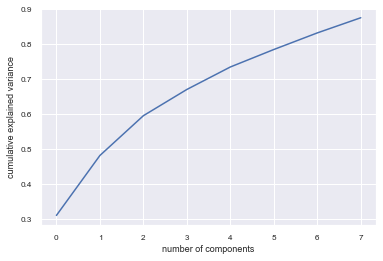

In [82]:
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

#Pre-processed data
scaler=StandardScaler()
scaler.fit(X_train)
X_scaled=scaler.transform(X_train)

#PCA
pca=PCA(n_components=.85) # Min explained variance of 85%
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 

print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:33]))

 
#Graph
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### NOTA: With 8 PCA components, we are able to explain 85% of variance.

In [84]:
#Let's test base model with 8 components
steps = [('scaler', StandardScaler()),
         ('pca', PCA(n_components=8)),
         ('lgr', LogisticRegression(solver='liblinear'))]
pipe_lr = Pipeline(steps)

pipe_lr.fit(X_train, y_train)
train_predictions = pipe_lr.predict(X_train)
test_predictions = pipe_lr.predict(X_test)

print("TRAIN:")
print(partial_evaluate(y_train, train_predictions))
print("TEST:")
print(partial_evaluate(y_test, test_predictions))

TRAIN:
(0.6184210526315789, 0.8106122448979591)
TEST:
(0.6508474576271187, 0.831973898858075)


#### NOTA: PCA is providing similar results than without, but dataset is simplified to 8 PCA features.

## 5.2 Feature importance

<function matplotlib.pyplot.show(close=None, block=None)>

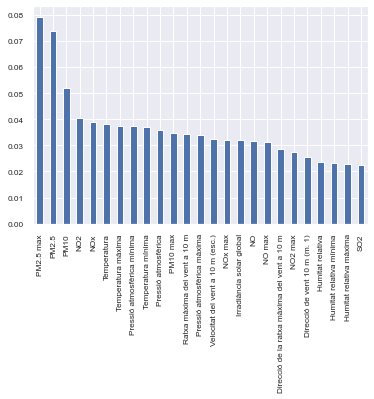

In [85]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

etc = ExtraTreesClassifier(n_estimators=100)

#Pre-processed data
scaler=StandardScaler()
scaler.fit(X_train)
X_scaled=scaler.transform(X_train)

#Model
etc.fit(X_scaled, y_train)

ranked_features=pd.Series(etc.feature_importances_, index=X_train.columns)
ranked_features.nlargest(25).plot(kind='bar')
plt.show

#### Based on correlated heat map and feature importance, let's take features selected: PM2.5, PM10, NO2, Pressió atmosfèrica, Temperatura, Velocitat del vent a 10 m (esc.) and Target Alert feature. I do not consider maximum feature of each one selected, because of higher correlation exists. 

In [86]:
#Let's check columns to copy data correctly
df0.columns

Index(['H2S max', 'NO max', 'NO2 max', 'NOx max', 'PM10 max', 'PM2.5 max',
       'SO2 max', 'H2S', 'NO', 'NO2', 'NOx', 'PM10', 'PM2.5', 'SO2',
       'Pressió atmosfèrica màxima', 'Pressió atmosfèrica mínima',
       'Humitat relativa màxima', 'Velocitat del vent a 10 m (esc.)',
       'Direcció de vent 10 m (m. 1)', 'Temperatura', 'Humitat relativa',
       'Pressió atmosfèrica', 'Precipitació', 'Irradiància solar global',
       'Temperatura màxima', 'Temperatura mínima', 'Humitat relativa mínima',
       'Ratxa màxima del vent a 10 m',
       'Direcció de la ratxa màxima del vent a 10 m',
       'Precipitació màxima en 1 minut', 'Alert'],
      dtype='object')

In [87]:
df1 = df0[['PM2.5','PM10','NO2','Pressió atmosfèrica','Temperatura','Velocitat del vent a 10 m (esc.)','Alert']]
df1.head()

,PM2.5,PM10,NO2,Pressió atmosfèrica,Temperatura,Velocitat del vent a 10 m (esc.),Alert
0,14.666667,26.555556,17.900000,1017.787500,2.714583,5.052083,0
1,9.125000,19.666667,12.666667,1023.345833,4.029167,4.885417,0
2,11.541667,15.291667,22.416667,1022.672917,3.562500,2.631250,0
3,7.458333,13.333333,20.800000,1020.043750,7.995833,3.593750,0
4,5.041667,17.541667,13.521739,1016.004167,8.281250,5.885417,0


In [53]:
#We create a csv to be used in Frontend app
df1.to_csv(r'FrontEnd_docs_related/Dataframe.csv')

In [88]:
#Let's simplify dataset features 
X_train, X_test, y_train, y_test = train_test_split(
                                        df1.drop('Alert', axis = 'columns'),
                                        df1['Alert'],
                                        train_size   = 0.8,
                                        shuffle      = True)

In [89]:
steps = [('scaler', StandardScaler()),
         ('lgr', LogisticRegression(solver='liblinear'))]
pipe_lr = Pipeline(steps)

pipe_lr.fit(X_train, y_train)
train_predictions = pipe_lr.predict(X_train)
test_predictions = pipe_lr.predict(X_test)

print("TRAIN:")
print(partial_evaluate(y_train, train_predictions))
print("TEST:")
print(partial_evaluate(y_test, test_predictions))

TRAIN:
(0.6339869281045751, 0.8171428571428572)
TEST:
(0.5957446808510638, 0.8140293637846656)


#### CONCLUSION: PCA and Features selected got similar results, so let's use Feature Importance because later on, it will help us to introduce features in frontend. Moreover, train and test results F1 score and accuracy are the same. Additionally, we will consider Standard Scaler as pre-processing.

# 6. Modelling

## 6.1 Model comparison

In [90]:
#Let's use dataset splitted box [56]

In [91]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [131]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# Compare Algorithms
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier


# prepare configuration for cross validation test harness
seed = 7

# models
models = []
models.append(('LR', LogisticRegression(max_iter=100,solver='liblinear')))
models.append(('KNC', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('XGB', XGBClassifier(eval_metric='mlogloss',use_label_encoder =False,scale_pos_weight = float)))

#Pre-processed data
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# evaluate each model in turn
results = []
names = []
for name, model in models:
    rkf = model_selection.RepeatedKFold(n_splits=10)
    #f1_score is used because of unbalanced dataset available. Accuracy score won't be suitable.
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=rkf,scoring='f1')  
    results.append(cv_results)
    names.append(name)
    msg1 = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg1)
    model.fit(X_train_scaled, y_train)
    train_predictions_model = model.predict(X_train_scaled)
    test_predictions = model.predict(X_test_scaled)
    print(full_evaluate(y_test, test_predictions))
    
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.624503 (0.049448)
(0.6402439024390244, 0.5645161290322581, 0.8075040783034257, 0.7394366197183099, 0.7389325375840448, array([[390,  37],
       [ 81, 105]]))


KeyboardInterrupt: 

#### CONCLUSION: SVC model got slightly better F1 values.

## 6.2 Hypertunning SVC

In [98]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C':[0.1,1,10,100],'gamma': [1,0.1,0.01,'scale'], 'kernel':['rbf','linear']}

svc = SVC(class_weight='balanced')


grid = GridSearchCV(
        estimator  = svc,
        param_grid = param_grid,
        scoring    = 'f1')

# fitting the model for grid search
grid.fit(X_train_scaled, y_train)


# Resultados

print(grid.best_estimator_)

grid_predictions = grid.predict(X_test_scaled)

full_evaluate(y_test, grid_predictions)

SVC(C=10, class_weight='balanced', gamma=0.1)
(0.65564738292011, 0.7125748502994012, 0.7960848287112561, 0.6071428571428571, 0.7699645551945437, array([[369,  77],
       [ 48, 119]]))


#### CONCLUSION: SVC model with hyperparameters C=0,1, gamma=scale, kernel=rbf and class_weihgt balanced got best F1 results.
#### As last chance to improve, let's see if Oversampling can improve results.

## 6.3 Oversampling methods

In [124]:
#Without oversampling

steps = [('scaler', StandardScaler()),
         ('SVC', SVC(C=0.1, gamma='scale',class_weight='balanced'))]

pipe_svc = Pipeline(steps)

pipe_svc.fit(X_train, y_train)
test_predictions_svc = pipe_svc.predict(X_test)

full_evaluate(y_test, test_predictions_svc)

(0.7014925373134328,
 0.7580645161290323,
 0.8042414355628059,
 0.6527777777777778,
 0.7912102440129939,
 array([[352,  75],
        [ 45, 141]]))

### 6.3.1 SMOTE

In [109]:
from imblearn.combine import SMOTETomek

os_us = SMOTETomek(sampling_strategy='not majority')
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

In [123]:

pipe_svc.fit(X_train_res, y_train_res)
train_predictions_svc = pipe_svc.predict(X_train_res)
test_predictions_svc = pipe_svc.predict(X_test)

full_evaluate(y_test, test_predictions_svc)

(0.6884422110552765,
 0.7365591397849462,
 0.797716150081566,
 0.6462264150943396,
 0.7804575558409509,
 array([[352,  75],
        [ 49, 137]]))

### 6.3.2 OVERSAMPLING

In [112]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_train_ove, y_train_ove = oversample.fit_resample(X_train, y_train)

In [122]:

pipe_svc.fit(X_train_ove, y_train_ove)
train_predictions_svc = pipe_svc.predict(X_train_ove)
test_predictions_svc = pipe_svc.predict(X_test)

full_evaluate(y_test, test_predictions_svc)

(0.6956521739130436,
 0.7311827956989247,
 0.8058727569331158,
 0.6634146341463415,
 0.7847951449220619,
 array([[358,  69],
        [ 50, 136]]))

### 6.3.3 UNDERSAMPLING

In [114]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_und, y_train_und = undersample.fit_resample(X_train, y_train)

In [121]:

pipe_svc.fit(X_train_und, y_train_und)
train_predictions_svc = pipe_svc.predict(X_train_und)
test_predictions_svc = pipe_svc.predict(X_test)

full_evaluate(y_test, test_predictions_svc)

(0.6923076923076922,
 0.7258064516129032,
 0.8042414355628059,
 0.6617647058823529,
 0.7821069728790512,
 array([[358,  69],
        [ 51, 135]]))

#### CONCLUSION: SMOTE got similar results than Oversampling and both, better than Undersampling and no treatment. I considered SMOTE method because confusion matrix got best results.

# 7. Summary and Results

As overall conclusion, our best results were got by:
    - Simplifying dataset to 7 features
    - SVC tuned
    - Class_weight balanced
    - Standardized data
    - SMOTE oversampling 

In [120]:
steps = [('scaler', StandardScaler()),
         ('SVC', SVC(C=0.1, gamma='scale',class_weight='balanced'))]

pipe_svc = Pipeline(steps)

pipe_svc.fit(X_train_res, y_train_res)
train_predictions_svc = pipe_svc.predict(X_train_res)
test_predictions_svc = pipe_svc.predict(X_test)

full_evaluate(y_test, test_predictions_svc)

(0.6884422110552765,
 0.7365591397849462,
 0.797716150081566,
 0.6462264150943396,
 0.7804575558409509,
 array([[352,  75],
        [ 49, 137]]))

In [119]:
steps = [('scaler', StandardScaler()),
         ('SVC', SVC(C=0.1, gamma='scale',class_weight='balanced'))]

pipe_svc = Pipeline(steps)

pipe_svc.fit(X_train_res, y_train_res)
train_predictions_svc = pipe_svc.predict(X_train_res)
test_predictions_svc = pipe_svc.predict(X_test)

full_evaluate(y_test, test_predictions_svc)

(0.6884422110552765,
 0.7365591397849462,
 0.797716150081566,
 0.6462264150943396,
 0.7804575558409509,
 array([[352,  75],
        [ 49, 137]]))

# 8. Saving model

In [70]:
import pickle

In [71]:
#Let's save the model into FrontEnd folder
pickle_out = open("FrontEnd_docs_related/aplication.pkl", "wb") 
pickle.dump(pipe_svc, pickle_out) 
pickle_out.close()